<a href="https://colab.research.google.com/github/spursbyte/algorithms_from_scratch/blob/main/hold_out_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics
#import matplotlib and seaborn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#global size of label text on the plots
matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)
#this ensures that plot is displayed in the notebook
%matplotlib inline
#initialize the lists to store test and train accuracies,initially we initialize at 50 %
train_accuracies=[0.5]
test_accuracies=[0.5]




In [6]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
# mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

# lets change the quality column with our new values based on the mapping dictionary
df.loc[:, 'quality'] = df.quality.map(quality_mapping)

In [9]:
df['quality'].value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [10]:
# shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

# lets select the top 1000 for training
df_train = df.head(1000)

# and the bottom 599 for testing
df_test = df.tail(599)

In [11]:
#iterate over few dept of values
for depth in range(1,25):
  #init the model
  clf=tree.DecisionTreeClassifier(max_depth=depth)
  #col/features for training
  cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']
  # fit the model on given features
  clf.fit(df_train[cols],df_train.quality)
  # create training & test aacuracies
  train_predictions=clf.predict(df_train[cols])
  test_predictions=clf.predict(df_test[cols])
  #calculate trainiing and test set accuracies
  train_accuracy=metrics.accuracy_score(df_train.quality,train_predictions)
  test_accuracy=metrics.accuracy_score(df_test.quality,test_predictions)
  #append accuracies
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)
  




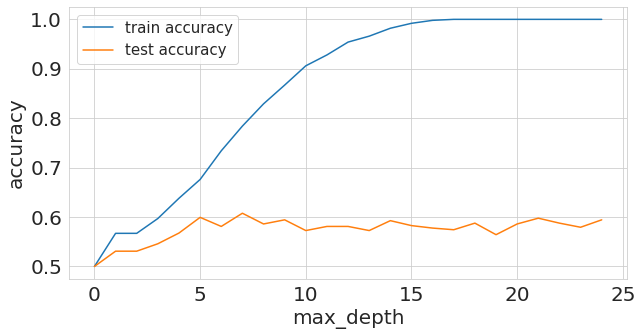

In [13]:
#create two plots using matplotlib and seaborn
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(train_accuracies,label='train accuracy')
plt.plot(test_accuracies,label='test accuracy')
plt.legend(loc='upper left',prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel('max_depth',size=20)
plt.ylabel('accuracy',size=20)
plt.show()
